# Compiling and simulating a 10-qubit Quantum Fourier Transform (QFT) algorithm

In this notebook, we simulate a 10-qubit Quantum Fourier Transform (QFT) algorithm.
The QFT algorithm is one of the most important quantum algorithms in quantum computing.
It is, for instance, part of the Shor algorithm for integer factorization.
The following code defines a 10-qubit QFT algorithm using CNOT and single qubit rotations and runs the simulation both at the gate level and at the pulse level.

In [1]:
from qutip import basis, fidelity
from qutip_qip.algorithms import qft_gate_sequence
from qutip_qip.device import LinearSpinChain
from qutip.ipynbtools import version_table
import qutip_qip

num_qubits = 10
# The QFT circuit
qc = qft_gate_sequence(num_qubits, swapping=False, to_cnot=True)
# Gate-level simulation
state1 = qc.run(basis([2] * num_qubits, [0] * num_qubits))
# Pulse-level simulation
processor = LinearSpinChain(num_qubits)
processor.load_circuit(qc)
state2 = processor.run_state(basis([2] * num_qubits,
                                   [0] * num_qubits)).states[-1]
fidelity(state1, state2)

/home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


np.float64(0.9998993895055154)

We plot the compiled pulses in the cell below.
The pulses plotted implement the QFT algorithm represented in the native gates of the spin chain model, with single-qubit gates marked by rotations over the $x$- and $z$-axes and the iSWAP gate implemented through the spin-spin exchange interaction, marked by $g_i$.
While the sign for single-qubit drive denotes the phase of the control pulse, the negative sign in the coupling strengths $g_i$ is only a result of the convention used in the definition of the interaction, defined in \cref{eq:ham spin chain}.

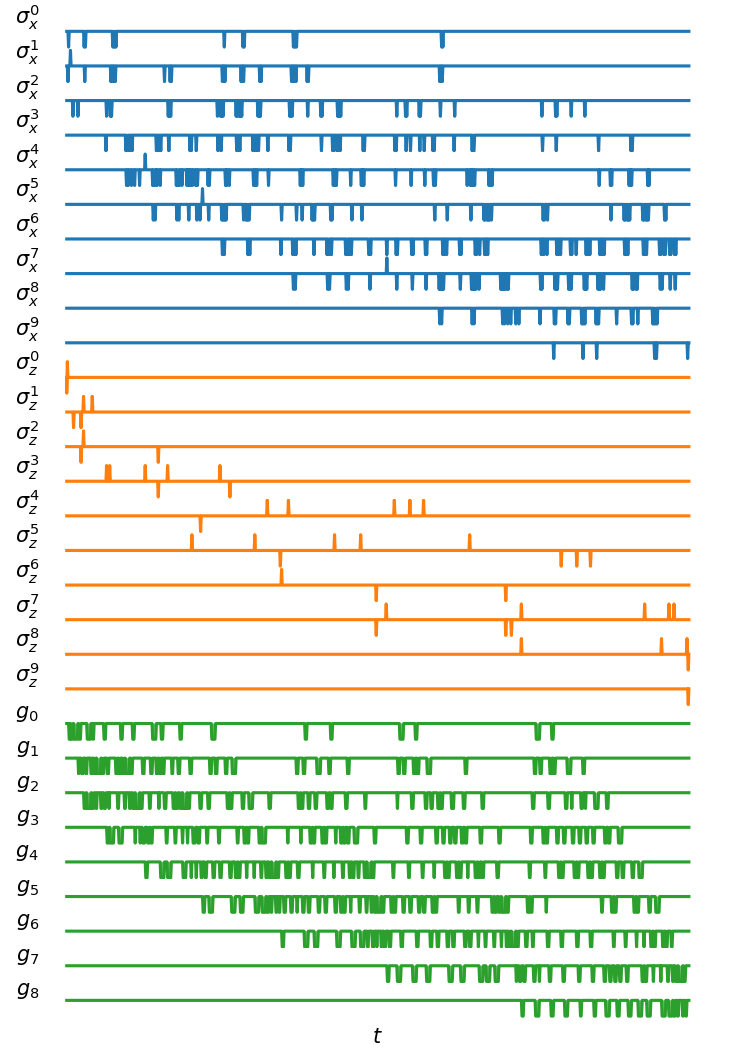

In [2]:
def get_control_latex(model):
    """
    Get the labels for each Hamiltonian.
    It is used in the method method :meth:`.Processor.plot_pulses`.
    It is a 2-d nested list, in the plot,
    a different color will be used for each sublist.
    """
    num_qubits = model.num_qubits
    num_coupling = model._get_num_coupling()
    return [
        {f"sx{m}": r"$\sigma_x^{}$".format(m) for m in range(num_qubits)},
        {f"sz{m}": r"$\sigma_z^{}$".format(m) for m in range(num_qubits)},
        {f"g{m}": r"$g_{}$".format(m) for m in range(num_coupling)},
    ]


fig, axes = processor.plot_pulses(
    figsize=(5, 7), dpi=150, pulse_labels=get_control_latex(processor.model)
)
axes[-1].set_xlabel("$t$");

In [3]:
print("qutip-qip version:", qutip_qip.version.version)
version_table()

qutip-qip version: 0.5.0.dev0+d58a82d


Software,Version
QuTiP,5.2.0.dev0+4033695
Numpy,2.2.4
SciPy,1.15.2
matplotlib,3.10.1
Number of CPUs,4
BLAS Info,Generic
IPython,9.1.0
Python,"3.12.0 | packaged by conda-forge | (main, Oct 3 2023, 08:43:22) [GCC 12.3.0]"
OS,posix [linux]
Cython,3.0.12
